## Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import numpy as np
from pprint import pprint
from wordcloud import WordCloud

from split_get_scale import SplitGetScale
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df = pd.read_csv('nutrition_repos_clean_stemmed_lemmatize.csv')
df.head()

,language,readme_contents,clean,clean_stemmed,clean_lemmatized
0,Java,# Nutrition\n\nNutrition is a highly configura...,nutrition\n\nnutrition is a highly configurabl...,nutrit nutrit highli configur mod enabl creati...,nutrition nutrition highly configurable mod en...
1,Java,\n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP \n\n仓库地址: htt...,app \n\n httpsgithubcomwangtianruinutritionmas...,app httpsgithubcomwangtianruinutritionmast api...,app httpsgithubcomwangtianruinutritionmaster a...
2,JavaScript,Nutrition Label jQuery Plugin by Nutritionix\r...,nutrition label jquery plugin by nutritionix\r...,nutrit label jqueri plugin nutritionix npmhttp...,nutrition label jquery plugin nutritionix npmh...
3,other,\n# off-nutrition-table-extractor\nThis reposi...,offnutritiontableextractor\nthis repository is...,offnutritiontableextractor thi repositori accu...,offnutritiontableextractor repository accumula...
4,Python,"﻿# wger\n<img src=""https://raw.githubuserconte...",wger\nimg srchttpsrawgithubusercontentcomwgerp...,wger img srchttpsrawgithubusercontentcomwgerpr...,wger img srchttpsrawgithubusercontentcomwgerpr...


In [3]:
# how many language observations do we have?
df.language.value_counts(normalize = True)

other         0.444444
JavaScript    0.290598
Python        0.162393
Java          0.102564
Name: language, dtype: float64

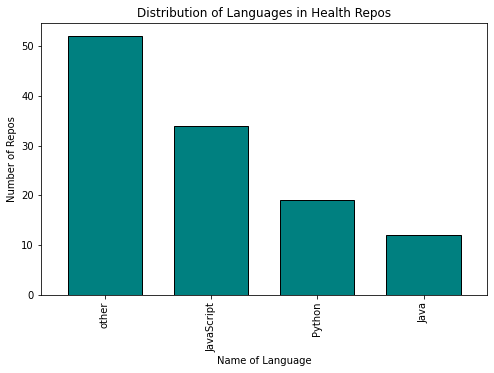

In [4]:
fig = plt.figure(figsize=(8, 5))

ax = df.language.value_counts().plot.bar(width=.7, ec='black', color='teal')
ax.set(title='Distribution of Languages in Health Repos', ylabel='Number of Repos', xlabel='Name of Language')
plt.savefig("Dist.png")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          117 non-null    object
 1   readme_contents   117 non-null    object
 2   clean             117 non-null    object
 3   clean_stemmed     117 non-null    object
 4   clean_lemmatized  117 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [6]:
df.shape

(117, 5)

In [7]:
words = ' '.join(df.clean_lemmatized)
words

"nutrition nutrition highly configurable mod enable creation health system minecraft downloadhttpsgithubcomwescooknutritionreleases wikihttpsgithubcomwescooknutritionwiki changelogchangelogmd nutrition guiscreenshotsguipng nutrition gui config fileshttpsgithubcomwescooknutritionwikiconfiguration nutrition allows define custom food group called nutrientshttpsgithubcomwescooknutritionwikinutrients apply effectshttpsgithubcomwescooknutritionwikieffects based nutrition level default nutrition come configured classic five food group system dairy fruit grain protein vegetable however many different system possible example include spicy tolerance bar eating enough spicy food grant permanent resistance fire zombie simulation must eat brain avoid negative effect gluten intolerance eat bread get sick updating mod please delete confignutritionnutrients directory receive new mod support necessary ' overwrite customizations mod supported mod supported default fivefood group system include abyssalcr

In [8]:
# list of all words
words_list = words.split()
words_list

['nutrition',
 'nutrition',
 'highly',
 'configurable',
 'mod',
 'enable',
 'creation',
 'health',
 'system',
 'minecraft',
 'downloadhttpsgithubcomwescooknutritionreleases',
 'wikihttpsgithubcomwescooknutritionwiki',
 'changelogchangelogmd',
 'nutrition',
 'guiscreenshotsguipng',
 'nutrition',
 'gui',
 'config',
 'fileshttpsgithubcomwescooknutritionwikiconfiguration',
 'nutrition',
 'allows',
 'define',
 'custom',
 'food',
 'group',
 'called',
 'nutrientshttpsgithubcomwescooknutritionwikinutrients',
 'apply',
 'effectshttpsgithubcomwescooknutritionwikieffects',
 'based',
 'nutrition',
 'level',
 'default',
 'nutrition',
 'come',
 'configured',
 'classic',
 'five',
 'food',
 'group',
 'system',
 'dairy',
 'fruit',
 'grain',
 'protein',
 'vegetable',
 'however',
 'many',
 'different',
 'system',
 'possible',
 'example',
 'include',
 'spicy',
 'tolerance',
 'bar',
 'eating',
 'enough',
 'spicy',
 'food',
 'grant',
 'permanent',
 'resistance',
 'fire',
 'zombie',
 'simulation',
 'must',
 

In [9]:
all_words = pd.Series(words_list).value_counts().reset_index()
all_words.columns=['word','count']
all_words = all_words.drop([0,2,5,12])

In [10]:
all_words.head(5)

,word,count
1,food,351
3,nutrition,218
4,user,205
6,data,191
7,gram,162


**What are the top 10 words for all repos?**

In [11]:
top_10_all_words = all_words.sort_values(by='count', ascending=False).head(10)
top_10_all_words

,word,count
1,food,351
3,nutrition,218
4,user,205
6,data,191
7,gram,162
8,recipe,151
9,use,146
10,app,145
11,database,137
13,file,131


In [12]:
# IDF vs common words

In [13]:
docs = [doc for doc in df.clean_lemmatized]

In [14]:
def idf(word):
    '''A simple way to calculate idf for demonstration. Note that this 
    function relies on a globally defined blogs variable.'''
    n_occurences = sum([1 for doc in docs if word in doc])
    return len(docs) / n_occurences



In [15]:
common_words = np.array(['food', 'nutrition', 'user', 'data', 'gram', 'recipe','use','app','database','file'])
common_words

array(['food', 'nutrition', 'user', 'data', 'gram', 'recipe', 'use',
       'app', 'database', 'file'], dtype='<U9')

In [16]:
# put the unique words into a data frame
words_idf = (pd.DataFrame(dict(words=common_words))
             
 # calculate the idf for each word
 .assign(idf=lambda train: train.words.apply(idf))
             
 # sort the data for presentation purposes
 .set_index('words')
 .sort_values(by='idf', ascending=True))

In [17]:
words_idf

,idf
words,
nutrition,1.181818
use,1.314607
app,1.344828
data,1.647887
food,1.720588
file,1.918033
user,2.489362
database,2.659091
gram,5.850000


In [18]:
words_idf.reset_index(inplace=True)


In [19]:
words_idf

,words,idf
0,nutrition,1.181818
1,use,1.314607
2,app,1.344828
3,data,1.647887
4,food,1.720588
5,file,1.918033
6,user,2.489362
7,database,2.659091
8,gram,5.850000
9,recipe,6.157895


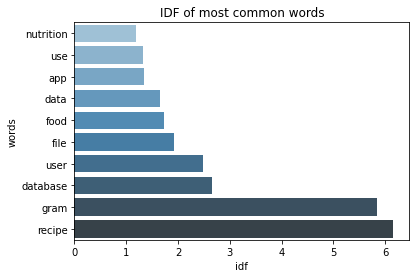

In [20]:
sns.barplot(data=words_idf, x='idf', y='words', palette="Blues_d")
plt.title('IDF of most common words')
plt.show()

### Question: What does the distribution of IDFs look like for the most common words?

**Takeaways:**

    - Using the top 10 most common words calculated in Question 1, we calculated the IDF values for each of our top 10 most common words.
    
    - The words in the top 10 with the highest IDF value were "recipe", "gram", "database", and "user".